In [1]:
import matplotlib.pyplot as plt
import requests
import asyncio
import nest_asyncio

nest_asyncio.apply()  # Enable nested asyncio support


In [2]:
docker_url = "http://localhost:5000"

## 10k requests on 3 servers

In [3]:
num_servers = 3
body = {"n": num_servers, "hostnames": ["s1", "s2"]}

res = requests.post(f"{docker_url}/add", json=body)
print(res.json())

{'message': {'N': 3, 'replicas': ['s1', 's2', 'pub_server_1']}, 'status': 'successful'}


In [4]:
num_requests = 10000
server_ids = []


async def make_request():
    res = requests.get(f"{docker_url}/home")
    if res.status_code == 200:
        server_ids.append(int(res.json()["message"][19:]))
    else:
        print(res.json())


async def make_all_requests():
    tasks = [make_request() for _ in range(num_requests)]
    await asyncio.gather(*tasks)


asyncio.get_event_loop().run_until_complete(make_all_requests())

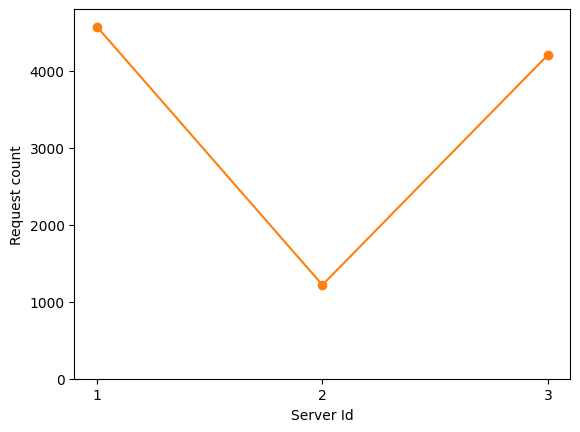

In [5]:
n, x, _ = plt.hist(server_ids, bins=3, alpha=0)
plt.plot([i for i in range(1, num_servers + 1)], n, marker="o", linestyle="-")
plt.ylabel("Request count")
plt.xlabel("Server Id")
plt.xticks([i for i in range(1, num_servers + 1)])
plt.show()

In [6]:
body = {"n": 3, "hostnames": ["s2"]}

res = requests.delete(f"{docker_url}/rm", json=body)
print(res.json())

{'message': '<Error> Length of hostname list is more than removable instances', 'status': 'failure'}


{'message': {'N': 1, 'replicas': ['s1']}, 'status': 'successful'}
{'message': {'N': 2, 'replicas': ['s1', 'pub_server_9']}, 'status': 'successful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
[2115. 7880.] [8.  8.5 9. ] <BarContainer object of 2 artists>


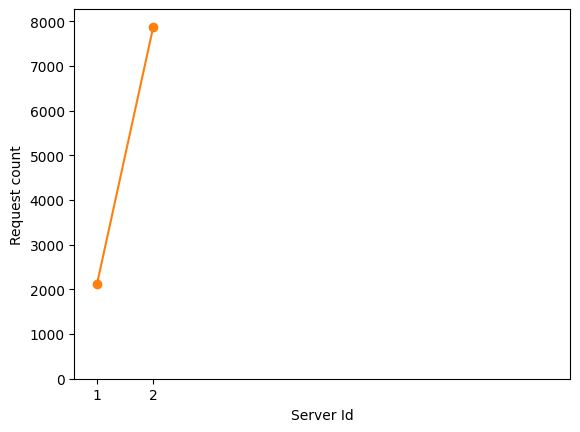

{'message': {'N': 3, 'replicas': ['s1', 'pub_server_9', 'pub_server_10']}, 'status': 'successful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
[2169. 3958. 3867.] [ 8.          8.66666667  9.33333333 10.        ] <BarContainer object of 3 artists>


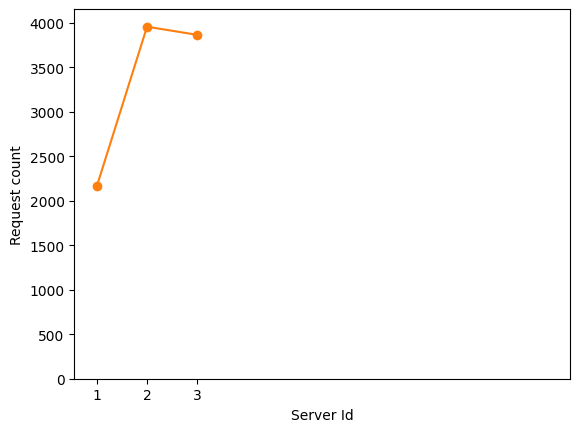

{'message': {'N': 4, 'replicas': ['s1', 'pub_server_9', 'pub_server_10', 'pub_server_11']}, 'status': 'successful'}
[2032. 3003. 3255. 1710.] [ 8.    8.75  9.5  10.25 11.  ] <BarContainer object of 4 artists>


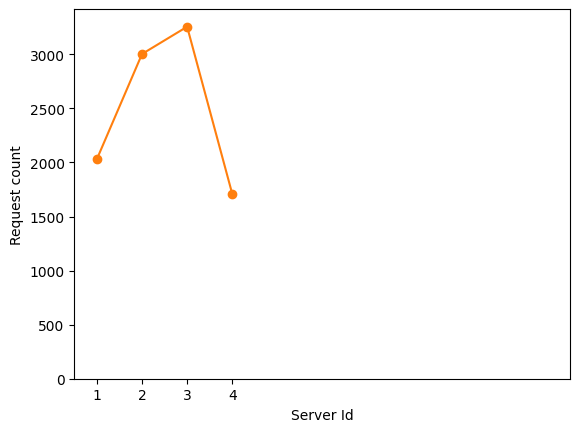

{'message': {'N': 5, 'replicas': ['s1', 'pub_server_9', 'pub_server_10', 'pub_server_11', 'pub_server_12']}, 'status': 'successful'}
{'message': '<Error> home endpoint does not exist in server replicas', 'status': 'unsuccessful'}
[2053. 2998.  930. 1772. 2246.] [ 8.   8.8  9.6 10.4 11.2 12. ] <BarContainer object of 5 artists>


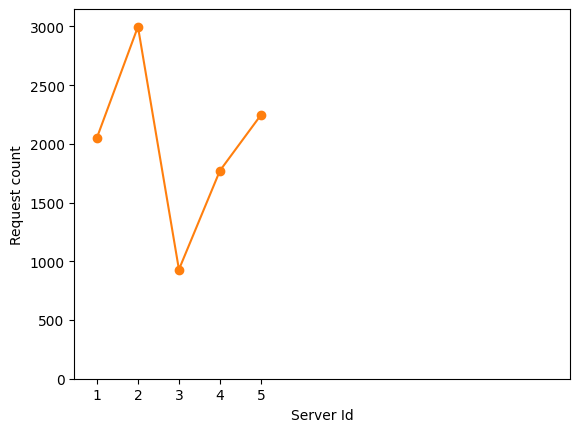

{'message': {'N': 6, 'replicas': ['s1', 'pub_server_9', 'pub_server_10', 'pub_server_11', 'pub_server_12', 'pub_server_13']}, 'status': 'successful'}
[1958. 2942.  923. 1822.  792. 1563.] [ 8.          8.83333333  9.66666667 10.5        11.33333333 12.16666667
 13.        ] <BarContainer object of 6 artists>


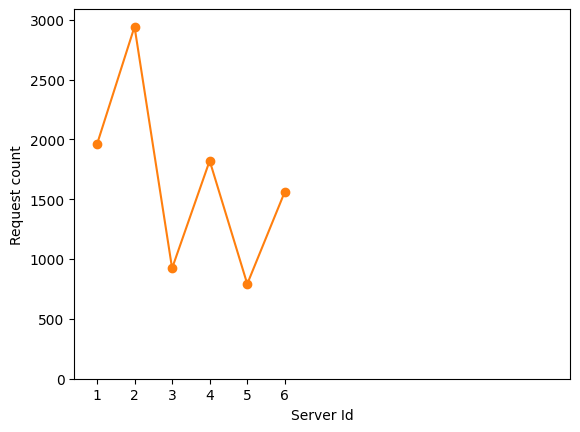

In [15]:
body = {"n": 1, "hostnames": ["s1"]}
res = requests.post(f"{docker_url}/add", json=body)
print(res.json())

all_server_ids = []

for num_servers in range(2, 7):
    body = {"n": 1, "hostnames": []}
    res = requests.post(f"{docker_url}/add", json=body)
    print(res.json())
    server_ids = []
    asyncio.get_event_loop().run_until_complete(make_all_requests())
    n, x, _ = plt.hist(server_ids, bins=num_servers, alpha=0)
    print(n, x, _)
    plt.plot([i for i in range(1, num_servers + 1)], n, marker="o", linestyle="-")
    plt.ylabel("Request count")
    plt.xlabel("Server Id")
    plt.xticks([i for i in range(1, num_servers + 1)])
    plt.show()

In [7]:
res = requests.get(f"{docker_url}/rep").json()

res.raise_for_status

{'message': {'N': 3, 'replicas': ['s1', 's2', 'pub_server_1']},
 'status': 'successful'}